In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# reading the csv file
df = pd.read_csv('../input/sonaralldata/sonar.all-data.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [4]:
# checking for null values
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [5]:
# Since there is no column name so lets add that
# column 0 to 59 so they will be named as Feature 0,..,Feature 59
# and lets name target column as Class

# First lets make a lost of column name
new_column_names = []
for i in range(60):
    new_column_names.append(f"Feature {i}")

new_column_names.append("Class")

new_column_names[55:]

['Feature 55', 'Feature 56', 'Feature 57', 'Feature 58', 'Feature 59', 'Class']

In [6]:
# Now lets assign it by simply using this
df.columns = new_column_names
df

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 51,Feature 52,Feature 53,Feature 54,Feature 55,Feature 56,Feature 57,Feature 58,Feature 59,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [7]:
# number of classes present in the dataset
df.Class.value_counts()

M    111
R     97
Name: Class, dtype: int64

In [8]:
# Replacing M with 0 and R with 1
df = df.replace({'Class': {'M': 0, 
                                'R': 1}})

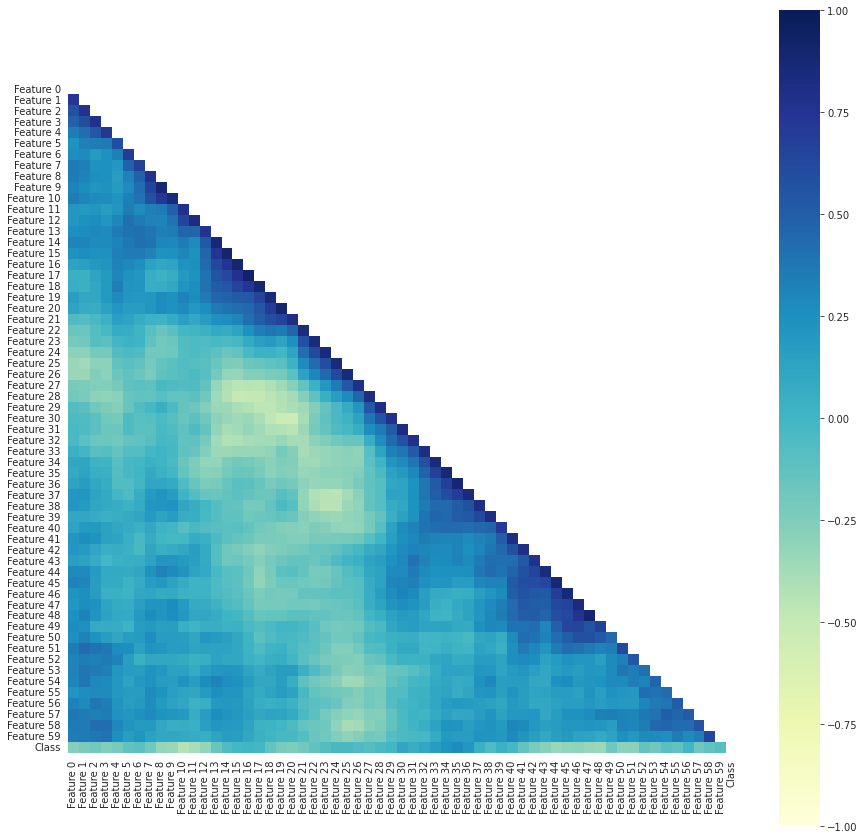

In [9]:
#  heatmap of correlation of columns with one another
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr, mask=mask, vmax=1,vmin=-1, square=True,cmap="YlGnBu",center=0)

In [10]:
corr_class = corr['Class']

In [11]:
# changing all values to postive and sorting and getting top 10 columns
corr_class.abs().sort_values(ascending=False)[:10]

Class         1.000000
Feature 10    0.432855
Feature 11    0.392245
Feature 48    0.351312
Feature 9     0.341142
Feature 44    0.339406
Feature 47    0.329333
Feature 8     0.321448
Feature 12    0.312811
Feature 45    0.305610
Name: Class, dtype: float64

In [12]:
# Lets make a new dataframe with these columns

new_df = df[['Class','Feature 10','Feature 11','Feature 48','Feature 9','Feature 44' , 'Feature 47' , 'Feature 8','Feature 12','Feature 45']]
new_df

,Class,Feature 10,Feature 11,Feature 48,Feature 9,Feature 44,Feature 47,Feature 8,Feature 12,Feature 45
0,1,0.1609,0.1582,0.0383,0.2111,0.2641,0.1343,0.3109,0.2238,0.1386
1,1,0.4918,0.6552,0.0409,0.2872,0.0621,0.0742,0.3337,0.6919,0.0203
2,1,0.6333,0.7060,0.0130,0.6194,0.2111,0.0744,0.5598,0.5544,0.0176
3,1,0.0881,0.1992,0.0681,0.1264,0.4295,0.1576,0.0598,0.0184,0.3654
4,1,0.4152,0.3952,0.0230,0.4459,0.0692,0.0085,0.3564,0.4256,0.0528
...,...,...,...,...,...,...,...,...,...,...
203,0,0.3108,0.2933,0.0858,0.2684,0.0902,0.1363,0.2328,0.2275,0.1085
204,0,0.3085,0.3425,0.0647,0.2154,0.0954,0.1255,0.1030,0.2990,0.0080
205,0,0.2716,0.2374,0.0535,0.2529,0.0910,0.1005,0.1258,0.1878,0.0757
206,0,0.2898,0.2812,0.0489,0.2354,0.1319,0.0954,0.1945,0.1578,0.0985


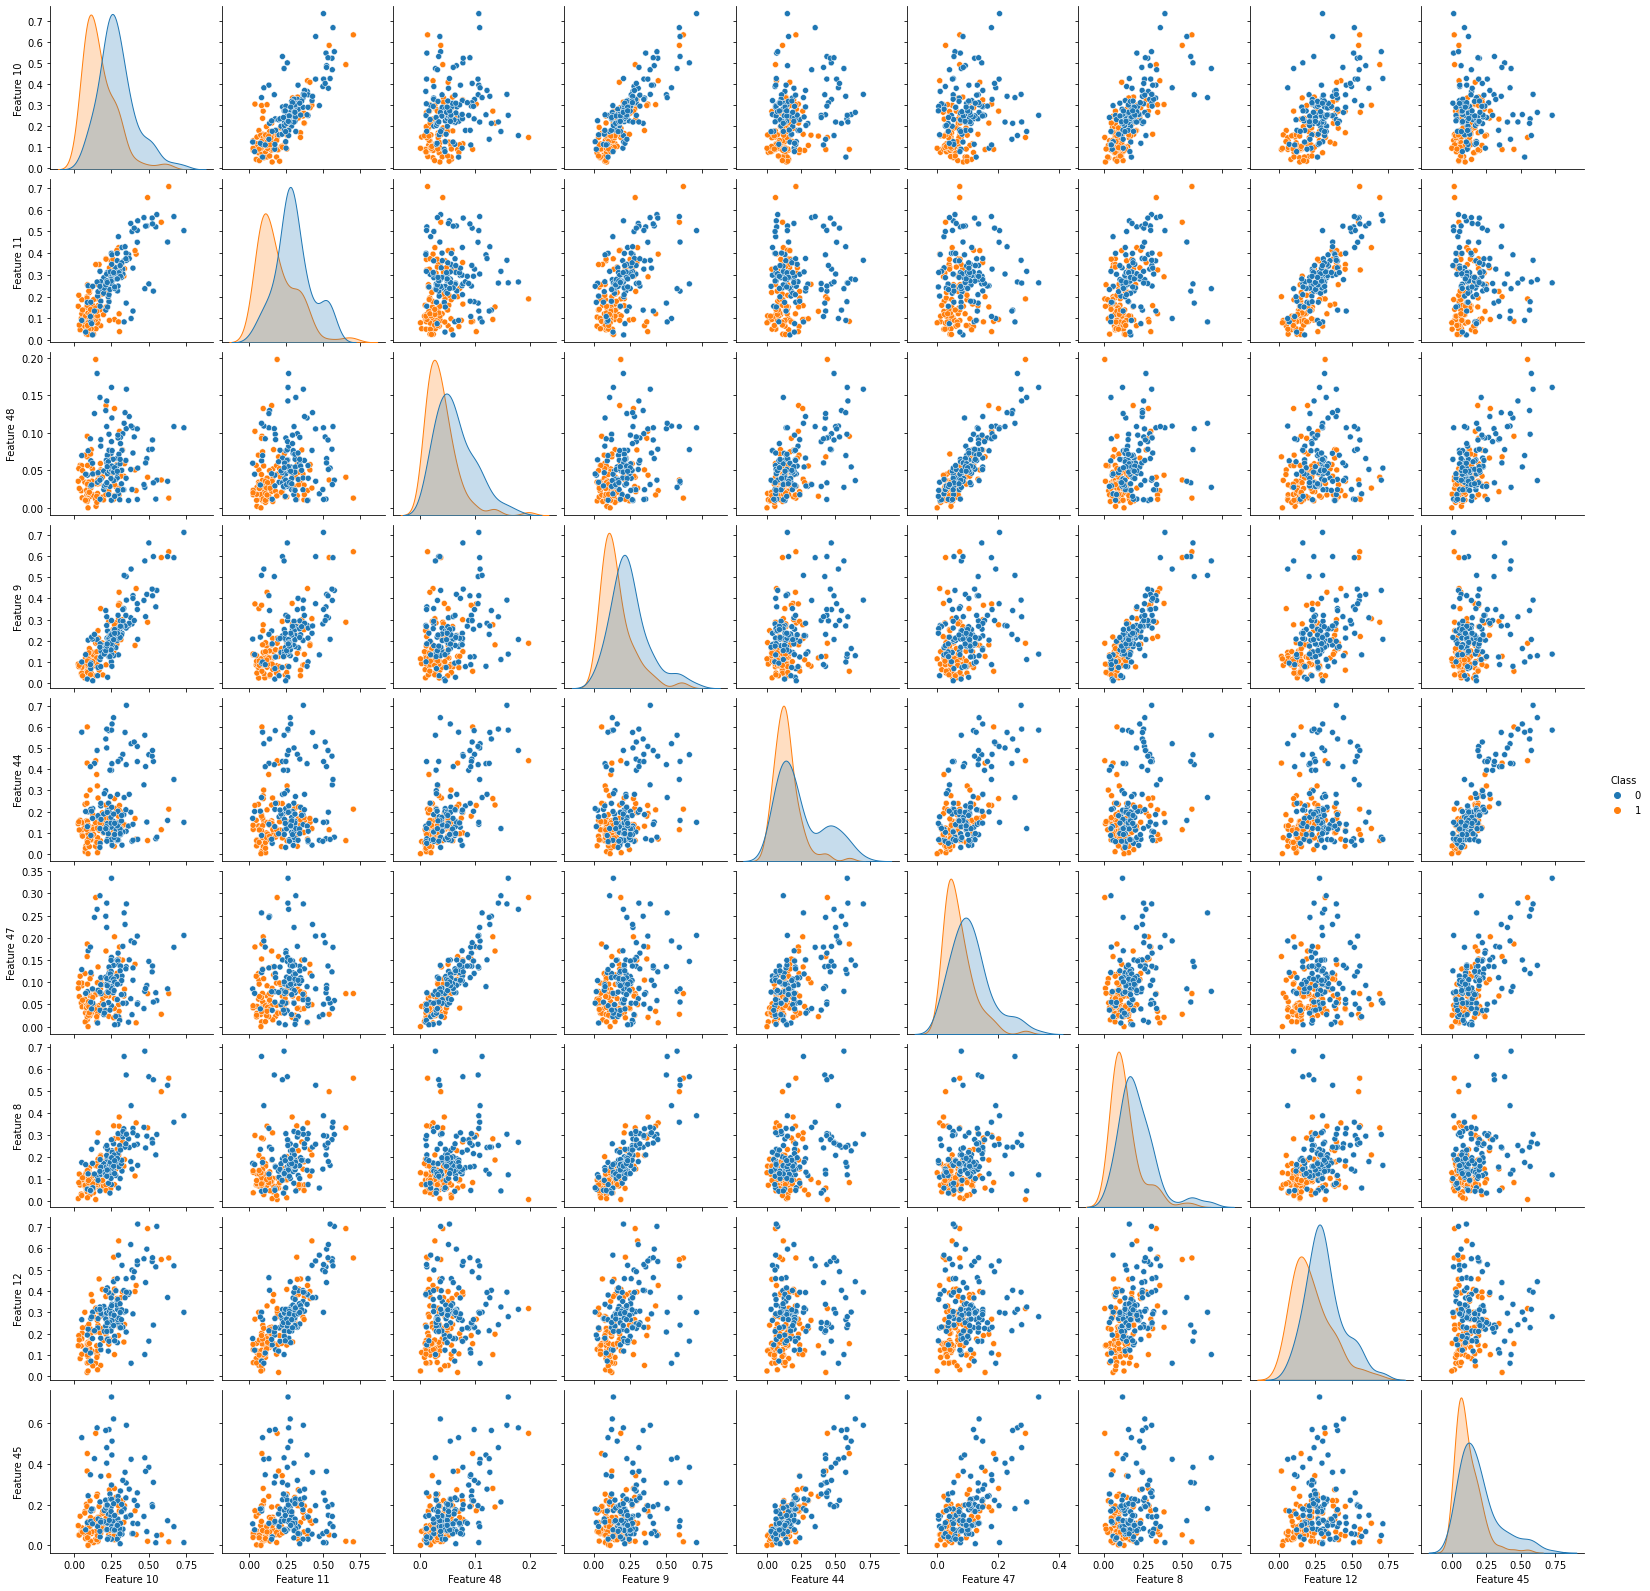

In [13]:
sns.pairplot(new_df,hue="Class")